In [1]:
import numpy as np
import matplotlib.pyplot as plt

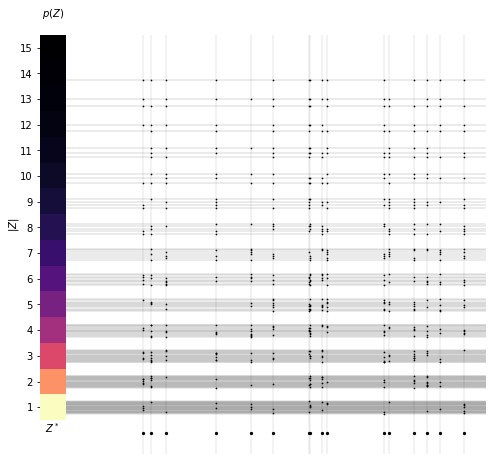

In [161]:
from collections import defaultdict


np.random.seed(203)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_frame_on(False)

ax.set_xticks([])

def rand_with_prob(l, k):
    x = np.zeros(l)
    x[:k] = 1    
    return np.random.choice(x, len(x), replace=False)

n = 16 # |Z*|
width = 16 # how wide the bead plot is
alpha = 0.25 # falloff for exp. distribution


z_star = np.random.uniform(0, 1, n) * width
zs = np.arange(1,len(z_star))
ps = np.exp(-alpha * zs)

# color bar for p(Z)
ax.imshow(ps[:,None], cmap='magma', origin='lower', extent=[-1, 0, 0.5, len(z_star)-0.5], zorder=10)
reps = 40 # max horizontal beads for one mass block

for i in range(1, len(z_star)):
    k = int(np.floor(reps * ps[i-1]+np.random.uniform(0,1)))
    for j in range(k):        
            y = i+j/k/2 - 0.25
            # subsample z and make horizontal bead line
            sample = z_star[rand_with_prob(len(z_star), i)>0]            
            ax.axhline(y, c='k', alpha=0.1)
            ax.scatter(sample, np.full((len(sample),), y), c='k', s=0.5)

# vertical bead line for Z*
for z in  z_star:
    ax.axvline(z, c='k', lw=0.1)    
ax.scatter(z_star, np.zeros_like(z_star), c='k', s=5)

## annotate
ax.text(-0.5, len(z_star)+0.2, '$p(Z)$', ha='center')
ax.text(-2.0, len(z_star)/2, '$|Z|$', ha='center', rotation=90)
ax.text(-0.5, 0.0, '$Z^*$', ha='center')
ax.set_yticks(np.arange(1, len(z_star)))
plt.savefig("z_samples.png", dpi=200)